numpy和pandas的区别：<br>

Numpy|Pandas
---|--
基础数据类型|扩展数据类型
关注数据的结构表达|关注数据的应用表达
维度：数据之间的关系|数据和索引之间的关系

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
my_arr = np.arange(10 ** 7)
my_list = list(range(10 ** 7))

In [19]:
%time for _ in range(10):my_arr2 = my_arr * 2

Wall time: 246 ms


In [20]:
%time for _ in range(10):my_list2 = [x * 2 for x in my_list]

Wall time: 9.4 s


上下一比较，发现用np进行乘法运算比list每个元素进行乘法循环快得多！

In [37]:
data1 = np.random.randn(2,3)

In [70]:
random.seed(1)
random.normalvariate(0,1) == random.gauss(0,1)

False

In [42]:
data2 = [[random.normalvariate(0,1) * 2 for _ in range(3)] for _ in range(2)]

In [39]:
data1 + data1

array([[ 1.19993095,  2.76257506,  0.0171453 ],
       [ 3.26918093, -1.5472999 , -1.84454419]])

In [40]:
data2 * 2

[[-0.26255443007845347, -0.7837780437334196, 1.0470201621301953],
 [0.6378622873151857, 0.21595647311050897, -1.4018629029366274],
 [-0.26255443007845347, -0.7837780437334196, 1.0470201621301953],
 [0.6378622873151857, 0.21595647311050897, -1.4018629029366274]]

高斯分布就是正太分布，既然一样，为什么在python中还要区别？只是说了一句gauss这个方法稍微比normalvariate要快一些。<br>
生成2行3列的数据，有data1、data2两种方法，而我们可以像对待单一数一样对array数组，从而进行算术运算

In [43]:
data1 = [9,8,7,6,5,4]
arr1 = np.array(data1)
series1 = pd.Series(data1)
series2 = pd.Series(arr1)
data1,arr1
series1 == series2

0    True
1    True
2    True
3    True
4    True
5    True
dtype: bool

In [45]:
arr2 = np.array([[1,2,3,4],[5,6,7,8]])

In [53]:
arr2.shape # 返回元组（行数，列数）
arr2.ndim # 返回行数
arr2.shape[1]
# 仅返回列数的方法是：array.shape[1]?

4

In [58]:
[0 for _ in range(10)]
np.zeros(10)

np.zeros((3,6))
[[0 for _ in range(6)] for _ in range(3)]

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

In [61]:
np.empty((2,3,2))
# 返回的数组中的元素不一定全部都是0，也有可能是垃圾值

array([[[ 9.,  0.],
        [ 8.,  0.],
        [ 7.,  0.]],

       [[ 6.,  0.],
        [ 5.,  0.],
        [ 4.,  0.]]])

In [65]:
arr1.dtype
arr1 = arr1.astype(np.float64) # 重新生成新的arry数组,原数组没有变化
arr1.dtype

dtype('float64')

In [69]:
arr3 = np.array([-3,-1,-1.1,2.2,-9,-10.2,0.8,-0.8])
arr3.dtype
arr3.astype(np.int32) # 相当于把数组中的每一个值都做了 // 1 的运算

array([ -3,  -1,  -1,   2,  -9, -10,   0,   0])

In [81]:
arr4 = np.array(['-1.23','-0.89'],dtype = 'S')
# np.string_ 是一种数据类型，而‘S’是他的code(代码)

In [85]:
arr4.astype(arr3.dtype)
# 这时候想到了怎么把pandas中的字符串转换成数字，也是用这样的方法

array([-1.23, -0.89])

In [86]:
arr6 = arr3[5:]
arr6

array([-10.2,   0.8,  -0.8])

In [90]:
arr6[1] = 12
arr3 # array进行切片时不复制数组，因为为了节约内存。如果非要复制的话：
arr7 = arr3[5:].copy()

In [46]:
arr7 = np.array(range(1,13)).reshape(3,4)
arr7

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [57]:
arr7[2,:] # 返回一行四列的array数组，先切片出，和arr7[2]切出来的一样
arr7[:,2] # 返回第2列的array数组

array([ 3,  7, 11])

In [11]:
df1 = pd.DataFrame(np.array(range(1,13)).reshape(3,4))
df1[2] # 切片出列，想切片出行的话，需要用到：
df1.iloc[:,2] # 和np.array一样的是：①都先切片行，然后是列，切出全部列时可以直接省略：但是切出全部行时不能省略；   
             #                   ②用的括号都是[]

0     3
1     7
2    11
Name: 2, dtype: int32

In [12]:
names = np.array(['bob','joe','will','bob','will','joe','joe'])
data = np.random.randn(7,4)

In [13]:
names == 'bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [19]:
data[names == 'bob']
# 需要保证在切片的axis上长度相同，否则将报错：
data[:,names == 'bob']

IndexError: boolean index did not match indexed array along dimension 1; dimension is 4 but corresponding boolean dimension is 7

In [16]:
data[[0,3]]
# 得出的结果和上面一样

array([[-1.00797238,  0.31846007,  1.23506944,  0.22770404],
       [-0.23384719,  0.75270464,  0.7047948 ,  1.05190159]])

In [18]:
df2 = pd.DataFrame(data)
df2.iloc[[0,3]]

,0,1,2,3
0,-1.007972,0.318460,1.235069,0.227704
3,-0.233847,0.752705,0.704795,1.051902


In [22]:
# 取反的方法有很多
data[names != 'bob']
data[~(names == 'bob')]

cond = names == 'bob'
data[~cond]

array([[ 0.37890744, -0.44118781, -0.29446031,  0.34984404],
       [-2.0661383 ,  0.43514602,  0.79314388,  0.41445514],
       [-0.44251662,  0.84440287,  0.49827678,  1.14556361],
       [ 1.18141621,  0.4541943 , -0.73280759, -0.24265834],
       [-0.68758124,  0.14890661, -0.26168447, -1.33676008]])

In [25]:
mask = (names == 'bob') | (names == 'will')
data[mask]

array([[-1.00797238,  0.31846007,  1.23506944,  0.22770404],
       [-2.0661383 ,  0.43514602,  0.79314388,  0.41445514],
       [-0.23384719,  0.75270464,  0.7047948 ,  1.05190159],
       [-0.44251662,  0.84440287,  0.49827678,  1.14556361]])

In [27]:
data[data < 0] = 0
data

array([[ 0.        ,  0.31846007,  1.23506944,  0.22770404],
       [ 0.37890744,  0.        ,  0.        ,  0.34984404],
       [ 0.        ,  0.43514602,  0.79314388,  0.41445514],
       [ 0.        ,  0.75270464,  0.7047948 ,  1.05190159],
       [ 0.        ,  0.84440287,  0.49827678,  1.14556361],
       [ 1.18141621,  0.4541943 ,  0.        ,  0.        ],
       [ 0.        ,  0.14890661,  0.        ,  0.        ]])

In [37]:
for i in df2.index:
    for j in df2.columns:
        if df2.iloc[i,j] < 0:
            df2.iloc[i,j] = 0

df2

,0,1,2,3
0,0.000000,0.318460,1.235069,0.227704
1,0.378907,0.000000,0.000000,0.349844
2,0.000000,0.435146,0.793144,0.414455
3,0.000000,0.752705,0.704795,1.051902
4,0.000000,0.844403,0.498277,1.145564
5,1.181416,0.454194,0.000000,0.000000
6,0.000000,0.148907,0.000000,0.000000


In [38]:
arr8 = np.arange(32).reshape((8, 4))

In [46]:
arr8[[1,5,7,2],[0,3,1,2]] # 还有另外一种方法?
arr8[[1,5,7,2]][:,[0,3,1,2]] = 0 # 返回了一个新的array
arr8

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [68]:
arr8.T # 相当于（用reshape生成的不是相同的矩阵
arr8.transpose((1,0)) # transepose前的轴顺序为0，1，转换的顺序为1，0，

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [155]:
# 求矩阵相乘
np.dot(arr8.T,arr8) # 还有一种：
arr8.T.dot(arr8) # 还有一种：
arr8.T @ arr8

array([[2240, 2352, 2464, 2576],
       [2352, 2472, 2592, 2712],
       [2464, 2592, 2720, 2848],
       [2576, 2712, 2848, 2984]])

In [52]:
arr8 * arr8
# 向量点积 官方说法叫做element-wise上的运算

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225],
       [256, 289, 324, 361],
       [400, 441, 484, 529],
       [576, 625, 676, 729],
       [784, 841, 900, 961]])

In [61]:
arr9 = np.arange(24).reshape((2,3,4))
arr9

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [66]:
arr9.transpose(1,2,0) 
# 重新排序矩阵，先取axis = 1轴上的数据，再取2轴上的数据，最后取0轴

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

In [64]:
arr9.reshape((3,2,4)) 
# 这里用reshape和transepose生成的结果不一样。

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [73]:
arr9.swapaxes(0,1) # 相当于
arr9.transpose(1,0,2)

# 当然arr9.swapaxes(0,2)相当于arr9.transpose(2,1,0)

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [83]:
np.sqrt(arr9)

array([[[ 0.        ,  1.        ,  1.41421356,  1.73205081],
        [ 2.        ,  2.23606798,  2.44948974,  2.64575131],
        [ 2.82842712,  3.        ,  3.16227766,  3.31662479]],

       [[ 3.46410162,  3.60555128,  3.74165739,  3.87298335],
        [ 4.        ,  4.12310563,  4.24264069,  4.35889894],
        [ 4.47213595,  4.58257569,  4.69041576,  4.79583152]]])

In [86]:
np.sqrt(arr9,arr10)  # 这个和书中的不一样

NameError: name 'arr10' is not defined

In [91]:
points = np.arange(10)
xs,ys = np.meshgrid(points,points)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])]

In [96]:
z = np.sqrt(xs ** 2 + ys ** 2)

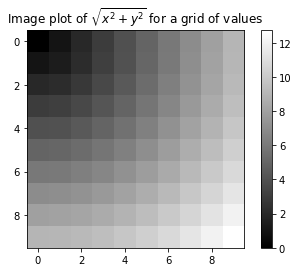

In [104]:
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values");

In [106]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [113]:
result = []
for x,y,c in zip(xarr,yarr,cond):
    if c:
        result.append(x)
    else:
        result.append(y)

# 使用列表推导更简单,但是对于特别大的数组运行速度就慢
result = [x if c else y for x,y,c in zip(xarr,yarr,cond)]

# 使用numpy.where
result = np.where(cond,xarr,yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [115]:
tarr = np.array([1.1,1.2,1.3])
np.where(tarr > 1.2,xarr,1)

ValueError: operands could not be broadcast together with shapes (3,) (5,) () 

In [121]:
arr9.cumprod(axis = 2) # 求本数及之前所有数字的积

array([[[     0,      0,      0,      0],
        [     4,     20,    120,    840],
        [     8,     72,    720,   7920]],

       [[    12,    156,   2184,  32760],
        [    16,    272,   4896,  93024],
        [    20,    420,   9240, 212520]]], dtype=int32)

In [125]:
bool1 = np.array([False,False,True,False])
bool1.all() # any()、 sum()

False

In [130]:
arr10 = np.random.randn(3,5)
arr10

array([[-1.60327557, -1.59915276,  0.652259  , -0.26453502, -0.50394325],
       [-1.61508888, -1.0403634 , -0.09707292, -0.5786306 , -0.31251476],
       [-0.59476214, -0.8000712 ,  1.53481624,  1.22144023, -1.22829614]])

In [140]:
arr11 = arr10.reshape(15)
arr11.sort()
arr11[int(0.25 * len(arr11))]

-1.2282961391488287

In [141]:
arr11

array([-1.61508888, -1.60327557, -1.59915276, -1.22829614, -1.0403634 ,
       -0.8000712 , -0.59476214, -0.5786306 , -0.50394325, -0.31251476,
       -0.26453502, -0.09707292,  0.652259  ,  1.22144023,  1.53481624])

In [145]:
names1 = np.unique(names)

In [148]:
names1.sort()
names1 # 还有另外一种方法：
sorted(set(names))

['bob', 'joe', 'will']

In [150]:
np.in1d(names,['bob','will'])

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [151]:
np.save('arr11',arr11)

In [153]:
np.load('arr11.npy')

array([-1.61508888, -1.60327557, -1.59915276, -1.22829614, -1.0403634 ,
       -0.8000712 , -0.59476214, -0.5786306 , -0.50394325, -0.31251476,
       -0.26453502, -0.09707292,  0.652259  ,  1.22144023,  1.53481624])

In [3]:
arr12 = np.random.randn(5,5)
mat = arr12.T.dot(arr12)

In [159]:
mat

array([[ 4.91868686, -0.24019107, -0.4025593 ,  4.26350291, -2.65850144],
       [-0.24019107,  6.81179841, -0.9145471 , -1.3955203 ,  1.65046942],
       [-0.4025593 , -0.9145471 ,  2.44024118, -0.17895363,  1.26906926],
       [ 4.26350291, -1.3955203 , -0.17895363,  4.30623751, -1.99023262],
       [-2.65850144,  1.65046942,  1.26906926, -1.99023262,  3.32319643]])

In [158]:
np.linalg.inv(mat) # 矩阵求逆

array([[ 110.12490144,  -35.09007891,  -34.71445616,  -92.57100982,
          63.3424844 ],
       [ -35.09007891,   11.39067162,   11.22805574,   29.49302384,
         -20.35335091],
       [ -34.71445616,   11.22805574,   11.61687682,   29.07702343,
         -20.36971838],
       [ -92.57100982,   29.49302384,   29.07702343,   78.15521693,
         -53.00053605],
       [  63.3424844 ,  -20.35335091,  -20.36971838,  -53.00053605,
          37.11964073]])

In [7]:
mat.dot(np.linalg.inv(mat)).astype('float16')

array([[ 1.,  0., -0., -0., -0.],
       [-0.,  1.,  0.,  0.,  0.],
       [-0., -0.,  1., -0., -0.],
       [ 0.,  0.,  0.,  1., -0.],
       [-0., -0., -0.,  0.,  1.]], dtype=float16)

In [12]:
q,r = np.linalg.qr(mat)
q.astype('int16') # 正交矩阵：具有逆矩阵的矩阵

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int16)

In [11]:
r.astype('int16') # 上三角矩阵：非零元素只存在在对角线及以上

array([[-3,  6,  6, -4,  1],
       [ 0, -2, -3, -2,  5],
       [ 0,  0, -4,  1, -2],
       [ 0,  0,  0, -2,  3],
       [ 0,  0,  0,  0,  0]], dtype=int16)

In [25]:
np.random.seed(1)
arr12 = np.random.randn(4,4) # 还可以用下面的方法
#np.random.seed(1) # 每次生成随机数之前都要用指定seed，这样才能生成相同的随机数，也可以用下面：
rds = np.random.RandomState(1)
arr13 = rds.normal(size=(4,4))
arr12 == arr13

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [32]:
random.randint(0,1) # 1 包括在内，而
np.random.randint(0,1) # higher 不包括在内

0

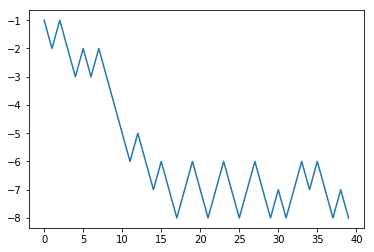

In [40]:
walk = []
position = 0
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:40]);

In [7]:
nwalks = 5000
nsteps = 1000
arr15 = np.random.randint(0,2,size = (nwalks,nsteps))
arr15

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0]])

In [8]:
arr15.cumsum(1) # 在axis=1上进行cumsum运算：求当前数及以前所有数的和

array([[  1,   1,   2, ..., 516, 517, 518],
       [  1,   1,   1, ..., 504, 505, 506],
       [  1,   2,   3, ..., 511, 511, 511],
       ..., 
       [  1,   2,   2, ..., 514, 515, 516],
       [  1,   2,   3, ..., 497, 497, 498],
       [  1,   1,   1, ..., 489, 489, 489]], dtype=int32)

In [14]:
steps = np.where(arr15 > 0,1,-1)
walks = steps.cumsum(1)

In [43]:
hist30 = (np.abs(walks) >= 30).any(1)
hist30

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [44]:
len(hist30)

5000

In [59]:
hist30.sum() # 有数字超过abs 30的行有多少行？

3439

In [66]:
(np.abs(walks[hist30]) >= 30).argmax(1) # 每行的最大数出现的位置

array([461, 103, 333, ..., 829, 523, 487], dtype=int64)